In [ ]:
import pandas as pd
import numpy as np

## Load Data

Menggunakan pandas untuk mengelola dataset dalam bentuk dataframe

- Dapat menggunakan url raw dari guthub dataset atau lokasi file lokal secara langsung.
- Delimiter merupakan pemisah antara setiap kolom pada dataset, pada dataset ini menggunakan pemisah berupa tab atau dapat ditulis '\t'

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/gustisalsatin/multilabeldataset/main/Multilabel%20dataset.csv",
                 delimiter='\t')
df

,content,Sentiment,Emotion
0,bukan menyenangkan malah bikin kesal hp saya...,Negative,Anger
1,kalo ngak niat bikin gamenya bagus hapus aja...,Negative,Anger
2,"kntl, masa ada iklan ngga bisa di skip. Pada...",Negative,Anger
3,"makin lama, makin gak jelas dri sblum di upd...",Negative,Anger
4,semenjak update sangat sangat buruk setiap m...,Negative,Anger
...,...,...,...
21691,Yang versi ini saya dan banyak yang mengakui b...,Neutral,Neutral
21692,"Yg di tunggu akhirnya update, tapi tolong perb...",Negative,Anger
21693,Yg masalah save nmor hp coba di cek nmor hp ny...,Neutral,Neutral
21694,yg nge chat byk tqpi bot semua . giliran mw bl...,Negative,Sad


Terdapat 3 kolom pada dataset, yaitu content, Sentiment, dan Emotion.

Menampilkan dataset yang sentimennya Negative

In [ ]:
df_negative = df[df['Sentiment']=='Negative']

In [ ]:
df_negative.reset_index(drop=True)

,content,Sentiment,Emotion
0,bukan menyenangkan malah bikin kesal hp saya...,Negative,Anger
1,kalo ngak niat bikin gamenya bagus hapus aja...,Negative,Anger
2,"kntl, masa ada iklan ngga bisa di skip. Pada...",Negative,Anger
3,"makin lama, makin gak jelas dri sblum di upd...",Negative,Anger
4,semenjak update sangat sangat buruk setiap m...,Negative,Anger
...,...,...,...
7639,Yang profesional dan berimbang dong,Negative,Sad
7640,Yang semua player ingin kan Menurut saya grafi...,Negative,Sad
7641,"Yg di tunggu akhirnya update, tapi tolong perb...",Negative,Anger
7642,yg nge chat byk tqpi bot semua . giliran mw bl...,Negative,Sad


dapat dilihat disitu index yang ditampilkan masih index sebelumnya sehingga dapat direset index

pada data df_negative hanya berisi database yang sentimenya negative sehingga kolom sentimen bisa diabaikan atau di drop.

In [ ]:
df_negative = df_negative.drop(columns=['Sentiment'] )

In [ ]:
df_negative

,content,Emotion
0,bukan menyenangkan malah bikin kesal hp saya...,Anger
1,kalo ngak niat bikin gamenya bagus hapus aja...,Anger
2,"kntl, masa ada iklan ngga bisa di skip. Pada...",Anger
3,"makin lama, makin gak jelas dri sblum di upd...",Anger
4,semenjak update sangat sangat buruk setiap m...,Anger
...,...,...
21688,Yang profesional dan berimbang dong,Sad
21690,Yang semua player ingin kan Menurut saya grafi...,Sad
21692,"Yg di tunggu akhirnya update, tapi tolong perb...",Anger
21694,yg nge chat byk tqpi bot semua . giliran mw bl...,Sad


Menampilkan jumlah dataset

In [ ]:
df_negative.value_counts('Emotion')

Emotion
Sad      3743
Anger    2650
Fear     1251
dtype: int64

# Preprocessing

- Membersihkan karakter,simbol,atau tanda baca yang tidak perlu digunakan
- Membuat semua huruf yang digunakan menjadi kecil (lowercase)
- Tokenisasi --> memisahkan setiap kalimat menjadi array
- Menghapus Stop Word (kata yang tidak berarti) jika diperlukan

Daftar kata yang digunakan dalam kalimat akan menjadi feature dan emotion merupakan label atau kelas dari kalimat tersebut.

Daftar kata hasil tokenisasi akan dibuat menjadi vektor token

https://www.geeksforgeeks.org/bag-of-words-bow-model-in-nlp/

##**Case Folding**
- membuat semua huruf menjadi lowercase
- menghilangkan simbol-simbol selain -

Import re atau regular expression

In [ ]:
import re

In [ ]:
# Case folding
def case_folding(doc):
  doc = doc.lower()                                               # membuat semua huruf menjadi huruf kecil
  doc = re.sub('[!”#$%&’()*+,./:;<=>?@[\]^_`{|}~]','',doc)        # menghilangkan simbol selain -, pada data hanya ada simbol ,.- dapat hanya menghapus ., saja
  doc = re.sub('[0-9]','',doc)                                    # menghilangkan angka pada dokumen
  doc = re.sub('\s+', ' ', doc)                                   # menghilangkan multiple space
  return doc

In [ ]:
# Melakukan case folding pada kolom content
df_negative['content'] = (df_negative['content']).apply(case_folding)

df_negative[['content']]

,content
0,bukan menyenangkan malah bikin kesal hp saya ...
1,kalo ngak niat bikin gamenya bagus hapus aja ...
2,kntl masa ada iklan ngga bisa di skip padahal...
3,makin lama makin gak jelas dri sblum di updat...
4,semenjak update sangat sangat buruk setiap ma...
...,...
21688,yang profesional dan berimbang dong
21690,yang semua player ingin kan menurut saya grafi...
21692,yg di tunggu akhirnya update tapi tolong perba...
21694,yg nge chat byk tqpi bot semua giliran mw bls ...


## **Tokenization**

Import NLTK

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def word_tokenization(doc):
  token = word_tokenize(doc)
  return token


In [ ]:
df_negative['content'] = (df_negative['content']).apply(word_tokenization)
df_negative[['content']]

,content
0,"[bukan, menyenangkan, malah, bikin, kesal, hp,..."
1,"[kalo, ngak, niat, bikin, gamenya, bagus, hapu..."
2,"[kntl, masa, ada, iklan, ngga, bisa, di, skip,..."
3,"[makin, lama, makin, gak, jelas, dri, sblum, d..."
4,"[semenjak, update, sangat, sangat, buruk, seti..."
...,...
21688,"[yang, profesional, dan, berimbang, dong]"
21690,"[yang, semua, player, ingin, kan, menurut, say..."
21692,"[yg, di, tunggu, akhirnya, update, tapi, tolon..."
21694,"[yg, nge, chat, byk, tqpi, bot, semua, giliran..."


In [ ]:
df_negative

,content,Emotion
0,"[bukan, menyenangkan, malah, bikin, kesal, hp,...",Anger
1,"[kalo, ngak, niat, bikin, gamenya, bagus, hapu...",Anger
2,"[kntl, masa, ada, iklan, ngga, bisa, di, skip,...",Anger
3,"[makin, lama, makin, gak, jelas, dri, sblum, d...",Anger
4,"[semenjak, update, sangat, sangat, buruk, seti...",Anger
...,...,...
21688,"[yang, profesional, dan, berimbang, dong]",Sad
21690,"[yang, semua, player, ingin, kan, menurut, say...",Sad
21692,"[yg, di, tunggu, akhirnya, update, tapi, tolon...",Anger
21694,"[yg, nge, chat, byk, tqpi, bot, semua, giliran...",Sad


##**Filtering**

In [ ]:
from nltk.corpus import stopwords

In [ ]:
listStopword =  set(stopwords.words('indonesian'))

def filtering(doc):
  hasil=[]
  for kata in doc:
    if kata not in listStopword:
      hasil.append(kata)
  return hasil

In [ ]:
df_negative['content'] = (df_negative['content']).apply(filtering)
df_negative[['content']]

,content
0,"[menyenangkan, bikin, kesal, hp, realme, c, ng..."
1,"[kalo, ngak, niat, bikin, gamenya, bagus, hapu..."
2,"[kntl, iklan, ngga, skip, perjalanan, kota, ma..."
3,"[gak, dri, sblum, update, game, sndiri, update..."
4,"[semenjak, update, buruk, main, bareng, discon..."
...,...
21688,"[profesional, berimbang]"
21690,"[player, grafik, nya, udah, oke, bus, ori, bus..."
21692,"[yg, tunggu, update, tolong, perbaiki, spbu, b..."
21694,"[yg, nge, chat, byk, tqpi, bot, giliran, mw, b..."


##**Stemming**


install dan import Sastrawi

In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def stemming(doc):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  hasil = []
  for kata in doc:
    kata = stemmer.stem(kata)
    hasil.append(kata)
  return hasil;

In [ ]:
#df_negative['content'] = df_negative['content'].apply(stemming)
#df_negative

# TF-IDF

In [ ]:
def untokenize(words):
    text = ' '.join(words)
    return text

df_negative['content'] = df_negative["content"].apply(untokenize)
df_negative['content']

0        menyenangkan bikin kesal hp realme c ngeblank ...
1        kalo ngak niat bikin gamenya bagus hapus aja d...
2        kntl iklan ngga skip perjalanan kota males mai...
3        gak dri sblum update game sndiri update suka s...
4        semenjak update buruk main bareng disconeted s...
                               ...                        
21688                                profesional berimbang
21690    player grafik nya udah oke bus ori bus rombak ...
21692    yg tunggu update tolong perbaiki spbu belok su...
21694    yg nge chat byk tqpi bot giliran mw bls suruh ...
21695    yg buruk daftar ktp cuman oy doang aplikasi ba...
Name: content, Length: 7644, dtype: object

In [ ]:
X = df_negative['content']
y = df_negative['Emotion']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import pandas as pd

In [ ]:


# Menggabungkan dokumen menjadi sebuah list
documents = df_negative['content'].values

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer(tokenizer=word_tokenize)

# Menghitung skor TF-IDF
tfidf_matrix = vectorizer.fit_transform(documents)

# Mendapatkan kata-kata unik dari TF-IDF
feature_names = vectorizer.get_feature_names_out()

# Mendapatkan nilai TF, IDF, dan TF-IDF dari dokumen ke-1
tf_values = tfidf_matrix[1].toarray()[0]
idf_values = vectorizer.idf_
tfidf_values = tf_values * idf_values

# Menyusun dalam bentuk tabel menggunakan pandas
data = {'TF': tf_values, 'IDF': idf_values, 'TF-IDF': tfidf_values}
df = pd.DataFrame(data, index=feature_names)

# Menghapus baris dengan nilai 0.0
df_filtered = df[(df != 0).all(1)]

# Mentransposenya
df_transposed = df_filtered.T

# Menampilkan tabel
df_transposed

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,aja,bagus,bener,bikin,bintang,bug,dah,diconet,game,gamenya,...,kalo,kasih,mabar,mulu,narik,ngak,niat,ntar,udah,update
TF,0.107367,0.104389,0.183698,0.288581,0.121789,0.121719,0.154221,0.294579,0.211262,0.319437,...,0.374180,0.120483,0.166942,0.164437,0.174781,0.200796,0.430865,0.240281,0.109872,0.114208
IDF,3.370924,3.277398,5.767420,4.530161,3.823710,3.821510,4.841941,9.248660,3.316415,5.014553,...,3.915941,3.782712,5.241327,5.162684,5.487460,6.304221,6.763753,7.543912,3.449567,3.585699
TF-IDF,0.361927,0.342123,1.059465,1.307317,0.465686,0.465150,0.746728,2.724464,0.700634,1.601836,...,1.465268,0.455753,0.874996,0.848935,0.959105,1.265862,2.914265,1.812662,0.379012,0.409516


In [ ]:
# Membangun vektor fitur menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()  # Ubah max_features sesuai kebutuhan
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
# Mengonversi vektor TF-IDF ke dalam bentuk dataframe
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
df_tfidf[(df_tfidf!= 0).any(axis=1)]

,aaaaaasu,aaahh,aah,aahngga,aaja,aamiin,aaminn,aanying,aaplikasi,aauto,...,zona,zonk,zoom,zoompadahal,zrx,zue,ال,تالوبركتهعاانوسلمعلاكم,ـق,ᗷᑌᖇiᘜ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Oversampling


In [ ]:
#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(random_state=42)
#X_resampled, y_resampled = ros.fit_resample(X_tfidf, y)

In [ ]:
#X_resampled.shape

# Split Dataset

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42 ,stratify=y)
#

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_tfidf, y)

In [ ]:
X_resampled.shape

(11229, 13436)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42 ,stratify=y_resampled)
X_train.shape, X_test.shape

((8983, 13436), (2246, 13436))

#Training

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Model Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train.toarray(), y_train)
y_pred_nb = naive_bayes_classifier.predict(X_test.toarray())



In [ ]:
# Evaluasi performa model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6429207479964381
Naive Bayes Classification Report:
               precision    recall  f1-score   support

       Anger       0.69      0.69      0.69       748
        Fear       0.58      0.98      0.73       749
         Sad       0.82      0.26      0.39       749

    accuracy                           0.64      2246
   macro avg       0.70      0.64      0.60      2246
weighted avg       0.70      0.64      0.60      2246



In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='poly', gamma='auto')
SVM.fit(X_train, y_train)
# predict the labels on validation dataset
y_pred_svm = SVM.predict(X_test)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.3330365093499555
SVM Classification Report:
               precision    recall  f1-score   support

       Anger       0.33      1.00      0.50       748
        Fear       0.00      0.00      0.00       749
         Sad       0.00      0.00      0.00       749

    accuracy                           0.33      2246
   macro avg       0.11      0.33      0.17      2246
weighted avg       0.11      0.33      0.17      2246



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Model K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=1100)  # Ubah n_neighbors sesuai kebutuhan
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.5004452359750667
KNN Classification Report:
               precision    recall  f1-score   support

       Anger       0.56      0.45      0.50       748
        Fear       0.46      0.60      0.52       749
         Sad       0.50      0.45      0.47       749

    accuracy                           0.50      2246
   macro avg       0.51      0.50      0.50      2246
weighted avg       0.51      0.50      0.50      2246



In [ ]:
# Model Decision Tree
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred_dt = decision_tree_classifier.predict(X_test)

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8098842386464826
Decision Tree Classification Report:
               precision    recall  f1-score   support

       Anger       0.76      0.85      0.81       748
        Fear       0.85      0.97      0.90       749
         Sad       0.82      0.61      0.70       749

    accuracy                           0.81      2246
   macro avg       0.81      0.81      0.80      2246
weighted avg       0.81      0.81      0.80      2246



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_model = SVC()

# Parameter tuning using GridSearchCV with 5-fold cross-validation
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['poly', 'rbf'],
              'gamma': [0.01, 0.1, 1, 10]}
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

# Best parameters
best_params_svm = grid_search_svm.best_params_
print("Best parameters :", best_params_svm)

Best parameters : {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# Evaluate the model
y_pred_svm = grid_search_svm.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

       Anger       0.81      0.87      0.84       748
        Fear       0.93      0.96      0.95       749
         Sad       0.84      0.75      0.79       749

    accuracy                           0.86      2246
   macro avg       0.86      0.86      0.86      2246
weighted avg       0.86      0.86      0.86      2246



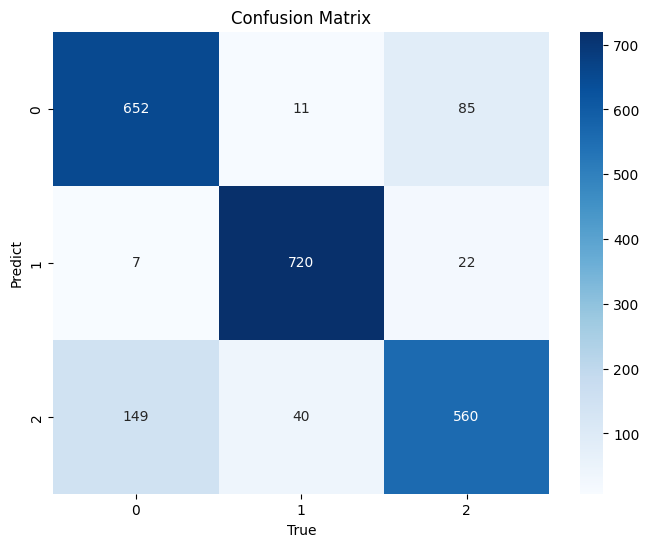

In [ ]:
cm = confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='poly', gamma='auto')
SVM.fit(X_train, y_train)
# predict the labels on validation dataset
y_pred_svm = SVM.predict(X_test)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.3330365093499555
SVM Classification Report:
               precision    recall  f1-score   support

       Anger       0.33      1.00      0.50       748
        Fear       0.00      0.00      0.00       749
         Sad       0.00      0.00      0.00       749

    accuracy                           0.33      2246
   macro avg       0.11      0.33      0.17      2246
weighted avg       0.11      0.33      0.17      2246



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=2500, random_state=0)
random_forest_classifier.fit(X_train, y_train)
y_pred_random_forest = random_forest_classifier.predict(X_test)


In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Random Forest Accuracy: 0.8557435440783615
Random Forest Classification Report:
               precision    recall  f1-score   support

       Anger       0.81      0.87      0.84       748
        Fear       0.91      0.96      0.93       749
         Sad       0.86      0.73      0.79       749

    accuracy                           0.86      2246
   macro avg       0.86      0.86      0.85      2246
weighted avg       0.86      0.86      0.85      2246

